# Mathematical morphology: erosion, dilation, opening, and closing


### 1. Overview & learning objectives
In this notebook we will work with histograms and learn about different ways to use a histogram to process images. 

With this notebook we will:

1. Explore the implementation of opening and closing in scikit-image.

1. Use morphological opening and closing to improve the results of image thresholding.


### 2. Fundamental morphological operations

Remember that, our ultimate goal in these lecture notebooks is to develop a method to segment cells from images in which cell borders are bright and the cytosol is dim. Over the last few weeks, we have written code to generate a *mask* that separates cell membranes from cytosol in our sample image. Here is a summary of what we did so far:

In /Users/rodrigo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/rodrigo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/rodrigo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/rodrigo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/rodrigo/opt/anaconda3/lib/

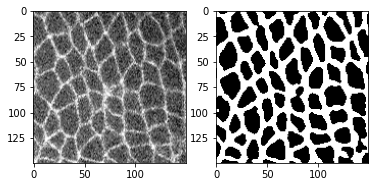

In [2]:
import matplotlib.pyplot as plt
import numpy
from skimage import exposure, filters, io

# Read image from disk.
animage = io.imread('cells.tif')

# Gaussian smoothing to facilitate edge detection.
animage_smooth = filters.gaussian(animage, sigma=2, preserve_range=True)

# Contrast stretch.
animage_rescaled = exposure.rescale_intensity(animage_smooth, out_range=numpy.uint8)

# Local threshold.
amask = animage_rescaled >= filters.threshold_local(animage_rescaled, 33, method='gaussian')

# Display image and mask.
fig, axs = plt.subplots(1, 2)
axs[0].imshow(animage, cmap='Greys_r')
axs[1].imshow(amask, cmap='binary_r')
plt.show()


The masks resulting from a threshold are rarely perfect. Depending on the threshold selection, too many or too few pixels will be considered to be "foreground", creating extraneous objects, holes, or discontinuities.

Mathematical morphology provides tools to "fix" thresholded images. Mathematical morphology is a discipline based on set theory that enables manipulation and analysis of geometric structures. Mathematical morphology deals with sets of pixels above or below the threshold value. **Erosion, dilation, opening or closing** are some mathematical morphology operations. Similar to our discussion of filters, in morphological operations the value of each pixel (on/off) is determined based on the status (on/off) of a set of neighbours. The set of neighbours that affect the value of any given pixel is determined by a structuring element, a "mask" that is overlaid on each pixel of the original image. Pixels that are "on" in the structuring element are taken into account in the calculation of the new pixel value. Manipulating the size and shape of the structuring element can therefore have dramatic consequences on the results of morphological operations.  

**Opening and closing**, specifically, can be useful to process binary images: opening separates fused objects, and closing fills holes in objects. Opening and closing are implemented in the methods **skimage.morphology.binary_opening and skimage.morphology.binary_closing**, respectively. 

Depending on your choice of threshold, use opening or closing to improve the mask that you generated above:

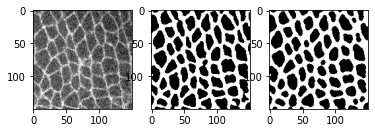

In [3]:
# DELETE THIS CODE.
from skimage import morphology

structelem = morphology.disk(3)
abettermask = morphology.binary_closing(amask, structelem)

# Display image and masks.
fig, axs = plt.subplots(1, 3)
axs[0].imshow(animage, cmap='Greys_r')
axs[1].imshow(amask, cmap='binary_r')
axs[2].imshow(abettermask, cmap='binary_r')
plt.show()
